<a href="https://colab.research.google.com/github/ebi19912/AI/blob/main/PatternRecognition4th_2009_6_Chapter_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

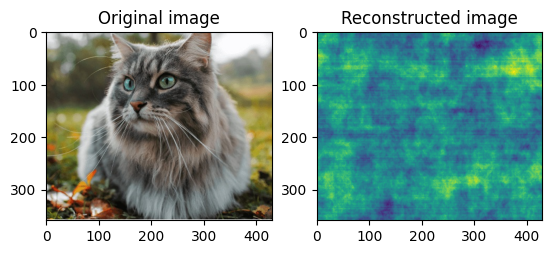

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = plt.imread("cat.jpg")

# Convert the image to grayscale
gray_image = np.mean(image, axis=-1)

# Calculate the Fourier transform of the image
fourier_transform = np.fft.fft2(gray_image)

# Calculate the magnitude of the Fourier transform
magnitude = np.abs(fourier_transform)

# Calculate the phase of the Fourier transform
phase = np.angle(fourier_transform)

# Convert the phase to degrees
phase_degrees = np.rad2deg(phase)

# Convert the magnitude and phase to polar coordinates
polar_magnitude = np.hypot(magnitude, phase_degrees)
polar_phase = phase_degrees

# Calculate the inverse Fourier transform of the polar coordinates
inverse_fourier_transform = np.fft.ifft2(polar_magnitude * np.exp(1j * polar_phase))

# Convert the inverse Fourier transform to an image
reconstructed_image = np.real(inverse_fourier_transform)

# Plot the original and reconstructed images
plt.subplot(121)
plt.imshow(image)
plt.title("Original image")

plt.subplot(122)
plt.imshow(reconstructed_image)
plt.title("Reconstructed image")

plt.show()


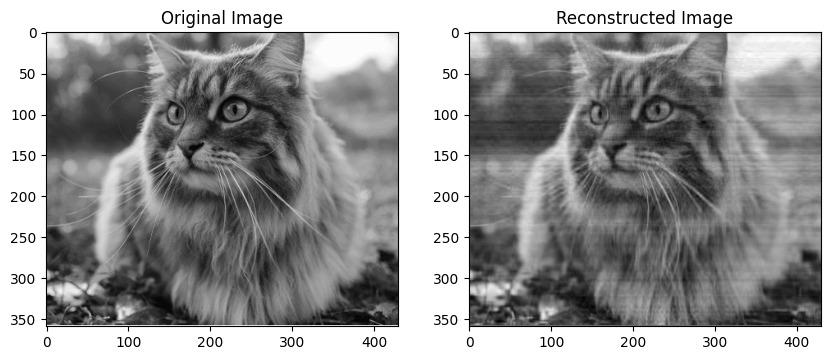

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Read the image in grayscale
#image=cv2.imread('cat.jpg')
img = cv2.imread('cat.jpg', cv2.IMREAD_GRAYSCALE)

# Normalize the image (this is important for PCA)
img = img / 255.0

# Subtract the mean
mean = np.mean(img)
img = img - mean

# Compute the covariance matrix
cov = np.cov(img)

# Compute the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov)

# Sort the eigenvectors based on their corresponding eigenvalues
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

# Reduce dimensions (e.g., keep the top 50 eigenvectors)
k = 50
eigenvectors = eigenvectors[:, :k]

# Transform the data
transformed = np.dot(eigenvectors.T, img)

# Reconstruct the image from the transformed data and the top-k eigenvectors
reconstructed = np.dot(eigenvectors, transformed) + mean

# Display the original and reconstructed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(reconstructed, cmap='gray')
plt.title('Reconstructed Image')
plt.show()


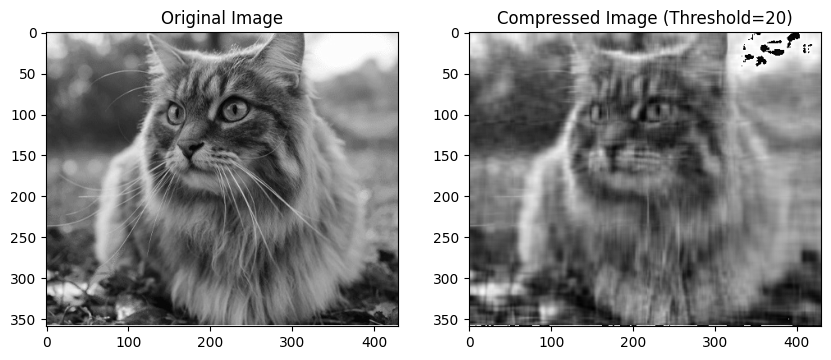

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'cat.jpg'  # Replace with the path to your image
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Perform SVD on the image matrix
U, S, V = np.linalg.svd(original_image, full_matrices=False)

# Set a threshold for singular values to control compression
threshold = 20
S_compressed = np.diag(S[:threshold])

# Reconstruct the compressed image
compressed_image = np.dot(U[:, :threshold], np.dot(S_compressed, V[:threshold, :]))

# Convert the compressed image back to uint8 format
compressed_image = np.uint8(compressed_image)

# Display the original and compressed images using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(compressed_image, cmap='gray')
plt.title('Compressed Image (Threshold={})'.format(threshold))

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


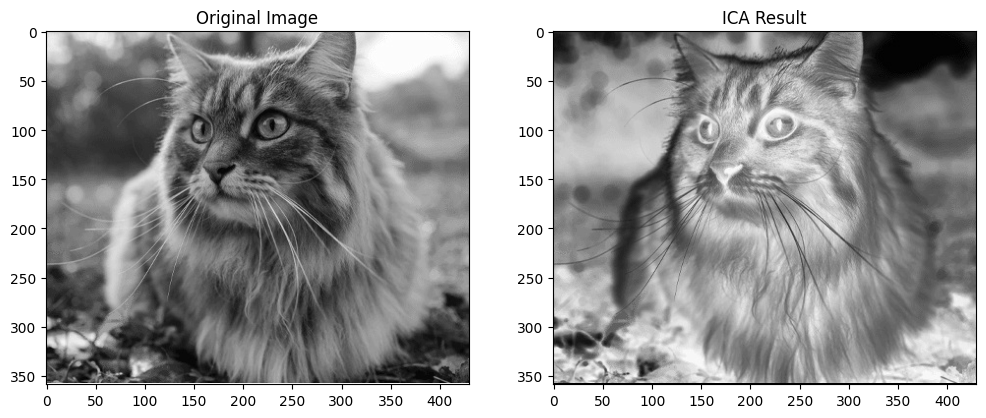

In [ ]:
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Load the image
image_path = 'cat.jpg'  # Replace with the path to your image
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Flatten the image to a 1D array
image_flattened = original_image.flatten()

# Apply ICA
ica = FastICA(n_components=1)  # You can adjust the number of components as needed
image_ica = ica.fit_transform(image_flattened.reshape(-1, 1))

# Reshape the transformed data back to the original image shape
image_ica_restored = image_ica.reshape(original_image.shape)

# Plot the results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(image_ica_restored, cmap='gray')
plt.title('ICA Result')

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


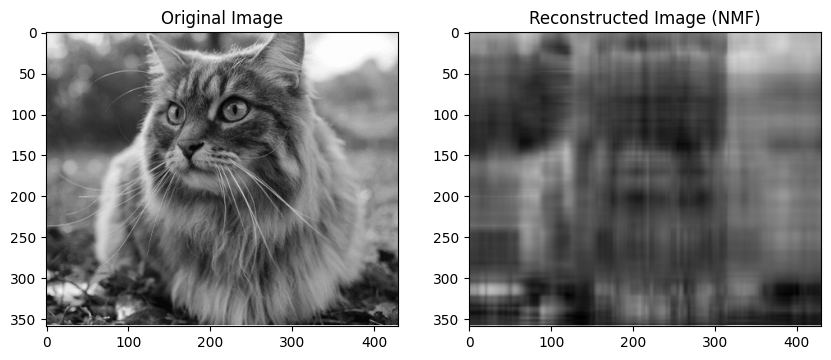

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from skimage import io, color

# Load your own image
image_path = "cat.jpg"
original_image = io.imread(image_path)

# Convert the image to grayscale if it's a color image
if len(original_image.shape) == 3:
    original_image = color.rgb2gray(original_image)

# Normalize pixel values to be between 0 and 1
data = original_image / 255.0

# Reshape the image data to be a 2D array of pixels
data_shape = data.shape
data_2d = data.reshape(data_shape[0], -1)

# Number of components (adjust as needed)
n_components = 5

# Apply NMF
nmf = NMF(n_components=n_components, init='random', random_state=0)
W = nmf.fit_transform(data_2d)
H = nmf.components_

# Reconstruct the image using the factorized matrices
reconstructed_image = np.dot(W, H).reshape(data_shape)

# Display original and reconstructed images side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(data, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Reconstructed Image (NMF)')
plt.imshow(reconstructed_image, cmap='gray')
plt.axis('off')

plt.show()


<ipython-input-1-c403284d5135>:35: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(kpca_result[:, 0], kpca_result[:, 1], cmap='viridis', s=1)


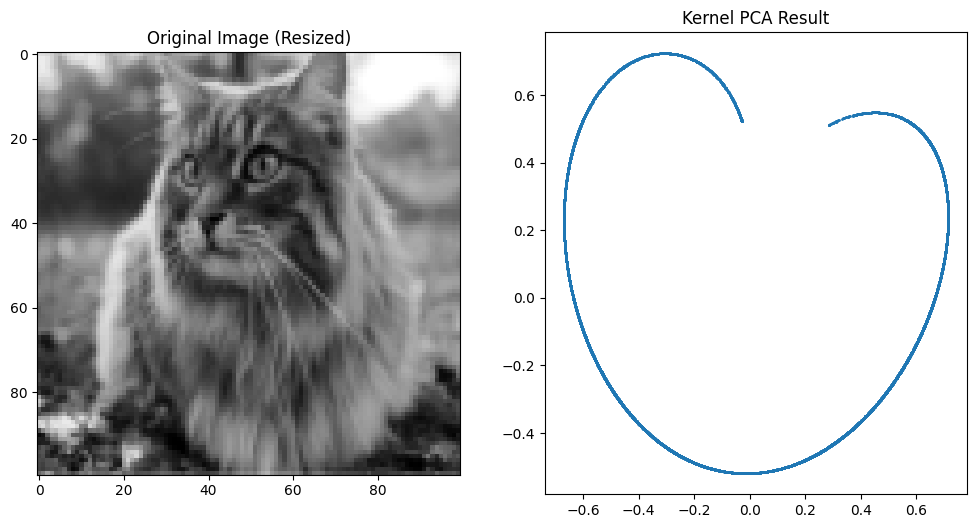

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
from PIL import Image  # Use PIL library to load the image

# Load your own image
image_path = "cat.jpg"
image = Image.open(image_path)

# Convert the image to a NumPy array
data = np.array(image)

# Reshape the image to a 2D array of pixels
data = data.reshape(data.shape[0] * data.shape[1], data.shape[2])

# Standardize the data
data_std = StandardScaler().fit_transform(data)

# Apply Kernel PCA
kpca = KernelPCA(n_components=2, kernel='rbf')  # You can choose different kernels
kpca_result = kpca.fit_transform(data_std)

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.scatter(kpca_result[:, 0], kpca_result[:, 1], cmap='viridis', s=1)
plt.title('Kernel PCA Result')

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
<ipython-input-3-add2612e3e83>:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding_result[:, 0], np.zeros_like(embedding_result[:, 0]), cmap='viridis', s=1)


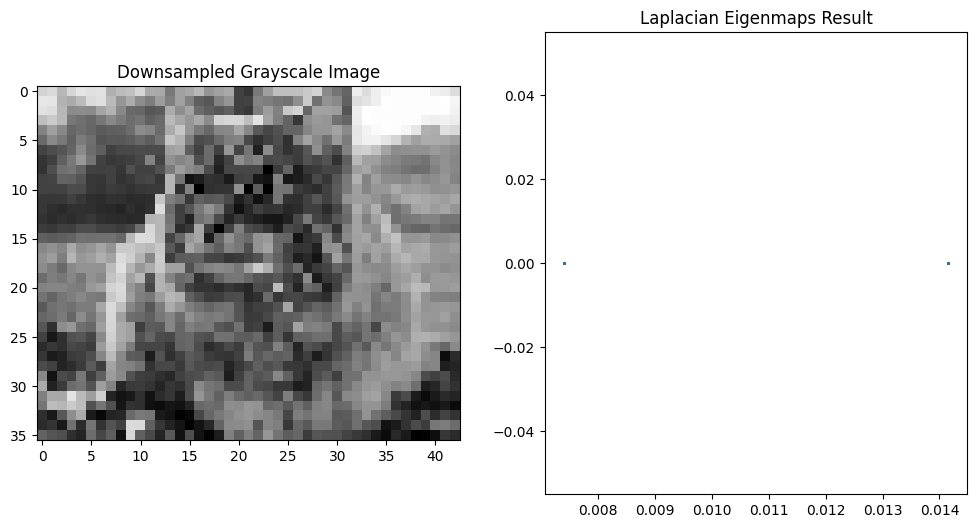

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import SpectralEmbedding
from skimage import io, color

# Load your own image
image_path = "cat.jpg"
image = io.imread(image_path)

# Convert the image to grayscale
gray_image = color.rgb2gray(image)

# Downsample the image to reduce memory usage (adjust the factor as needed)
downsample_factor = 0.1
downsampled_image = gray_image[::int(1/downsample_factor), ::int(1/downsample_factor)]

# Flatten the image to create a 1D array of pixel values
data = downsampled_image.flatten().reshape(-1, 1)

# Apply Laplacian eigenmaps
embedding = SpectralEmbedding(n_components=1, n_neighbors=10)
embedding_result = embedding.fit_transform(data)

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(downsampled_image, cmap='gray')
plt.title('Downsampled Grayscale Image')

plt.subplot(1, 2, 2)
plt.scatter(embedding_result[:, 0], np.zeros_like(embedding_result[:, 0]), cmap='viridis', s=1)
plt.title('Laplacian Eigenmaps Result')

plt.show()


<ipython-input-4-e7a22c5df23b>:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding_result[:, 0], np.zeros_like(embedding_result[:, 0]), cmap='viridis', s=1)


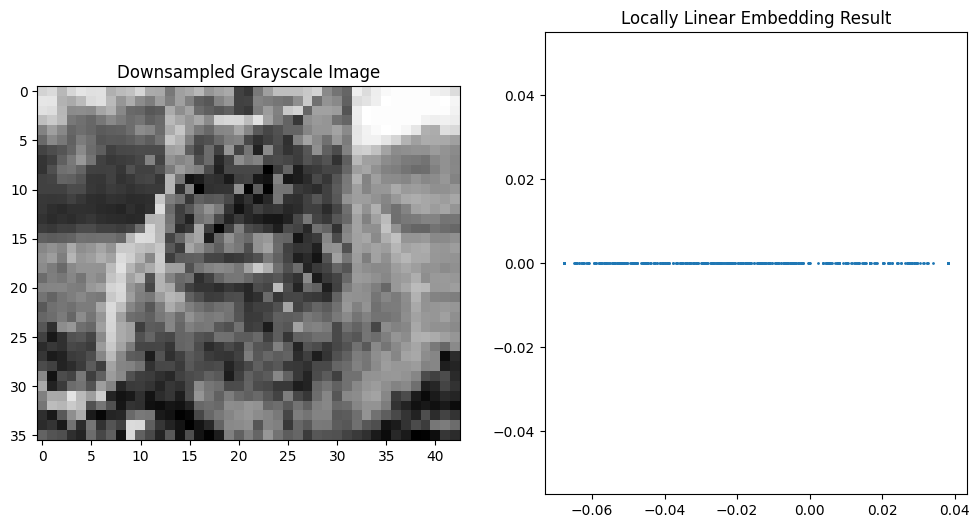

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import LocallyLinearEmbedding
from skimage import io, color

# Load your own image
image_path = "cat.jpg"
image = io.imread(image_path)

# Convert the image to grayscale
gray_image = color.rgb2gray(image)

# Downsample the image to reduce memory usage (adjust the factor as needed)
downsample_factor = 0.1
downsampled_image = gray_image[::int(1/downsample_factor), ::int(1/downsample_factor)]

# Flatten the image to create a 1D array of pixel values
data = downsampled_image.flatten().reshape(-1, 1)

# Apply Locally Linear Embedding (LLE)
lle = LocallyLinearEmbedding(n_components=1, n_neighbors=10, eigen_solver='dense')
embedding_result = lle.fit_transform(data)

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(downsampled_image, cmap='gray')
plt.title('Downsampled Grayscale Image')

plt.subplot(1, 2, 2)
plt.scatter(embedding_result[:, 0], np.zeros_like(embedding_result[:, 0]), cmap='viridis', s=1)
plt.title('Locally Linear Embedding Result')

plt.show()


<ipython-input-5-6b12e33758a6>:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding_result[:, 0], embedding_result[:, 1], cmap='viridis', s=1)


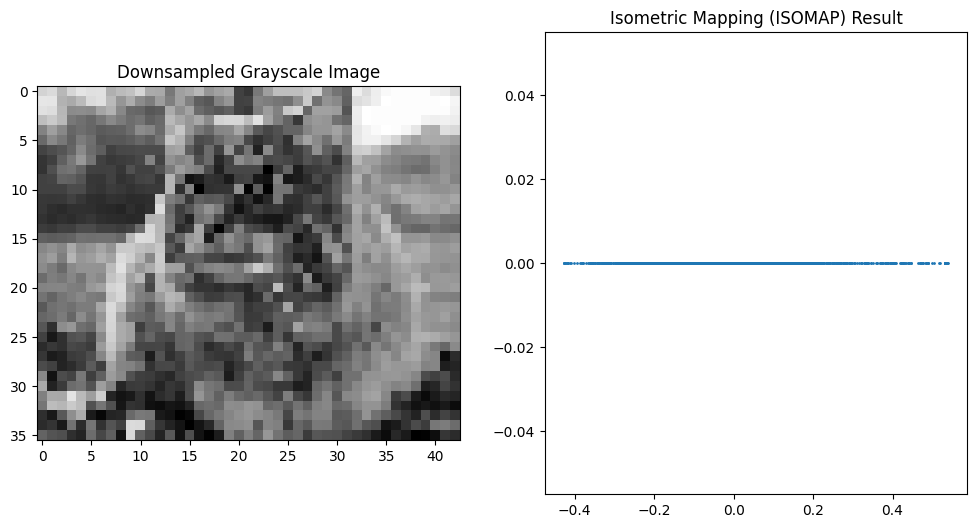

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap
from skimage import io, color

# Load your own image
image_path = "cat.jpg"
image = io.imread(image_path)

# Convert the image to grayscale
gray_image = color.rgb2gray(image)

# Downsample the image to reduce memory usage (adjust the factor as needed)
downsample_factor = 0.1
downsampled_image = gray_image[::int(1/downsample_factor), ::int(1/downsample_factor)]

# Flatten the image to create a 1D array of pixel values
data = downsampled_image.flatten().reshape(-1, 1)

# Apply Isometric Mapping (ISOMAP)
isomap = Isomap(n_components=2, n_neighbors=10)
embedding_result = isomap.fit_transform(data)

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(downsampled_image, cmap='gray')
plt.title('Downsampled Grayscale Image')

plt.subplot(1, 2, 2)
plt.scatter(embedding_result[:, 0], embedding_result[:, 1], cmap='viridis', s=1)
plt.title('Isometric Mapping (ISOMAP) Result')

plt.show()


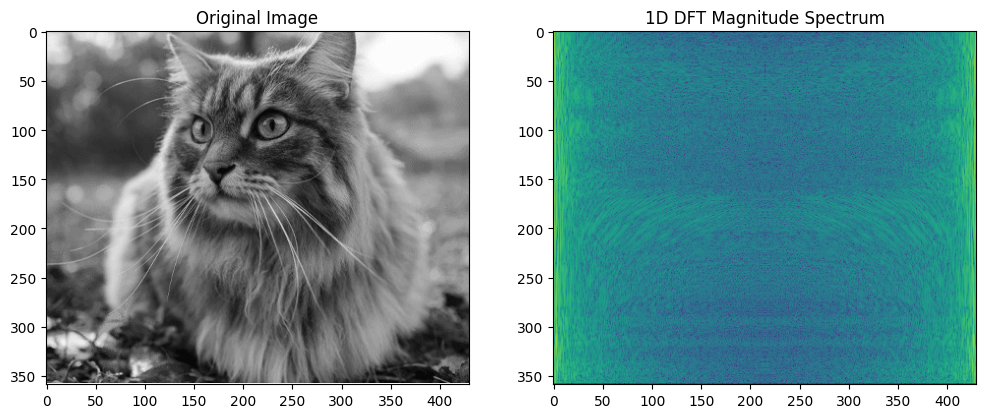

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the image
image_path = "cat.jpg"
image = Image.open(image_path).convert("L")  # Convert to grayscale
data = np.array(image)

# Perform 1D DFT along the rows (axis=1)
dft_result = np.fft.fft(data, axis=1)

# Plot the original image and the magnitude spectrum
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(data, cmap="gray")
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(np.log(1 + np.abs(dft_result)), cmap="viridis")
plt.title("1D DFT Magnitude Spectrum")

plt.show()


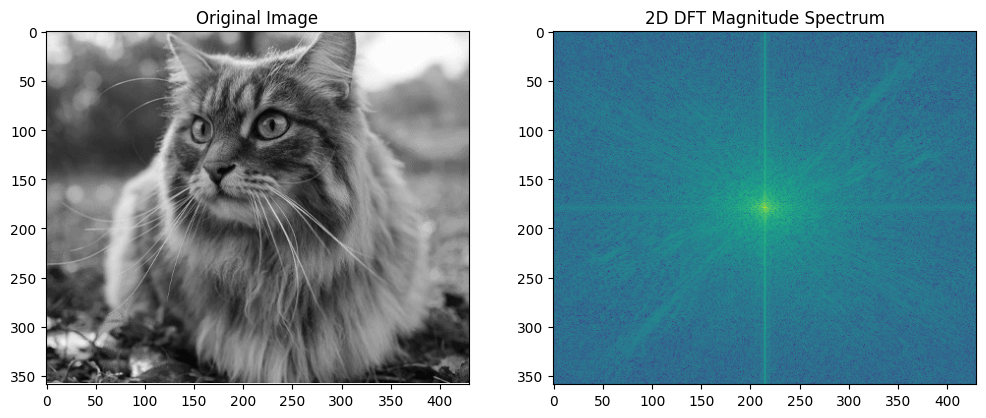

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the image
image_path = "cat.jpg"
image = Image.open(image_path).convert("L")  # Convert to grayscale
data = np.array(image)

# Perform 2D DFT
dft_result = np.fft.fft2(data)

# Shift zero frequency components to the center
dft_result_shifted = np.fft.fftshift(dft_result)

# Calculate magnitude spectrum
magnitude_spectrum = np.log(1 + np.abs(dft_result_shifted))

# Plot the original image and the magnitude spectrum
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(data, cmap="gray")
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap="viridis")
plt.title("2D DFT Magnitude Spectrum")

plt.show()


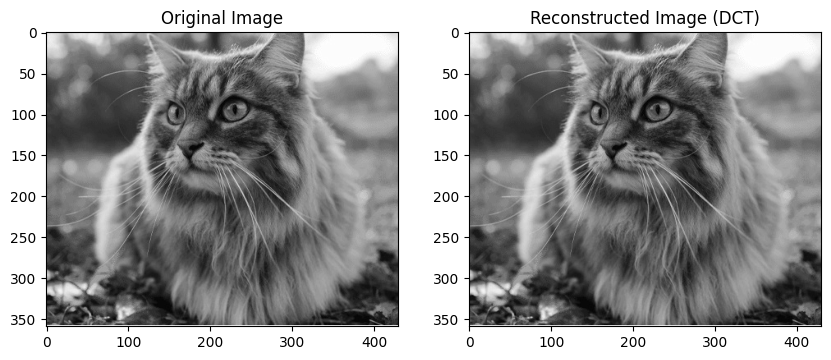

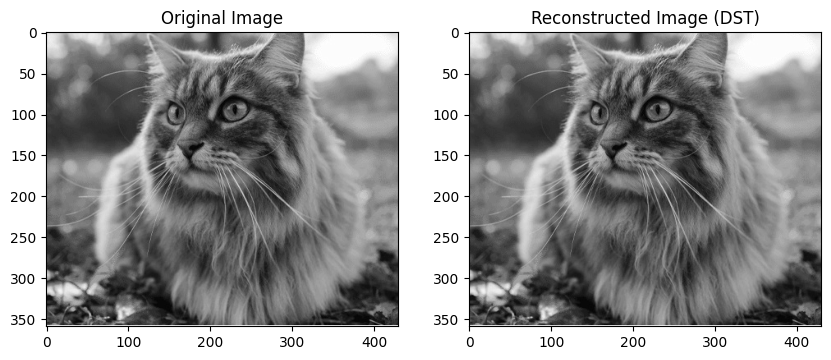

In [4]:
import numpy as np
from scipy.fftpack import dct, idct, dst, idst
from PIL import Image
import matplotlib.pyplot as plt

def apply_dct(image_path):
    # Load the image
    image = Image.open(image_path).convert('L')  # Convert to grayscale
    pixels = np.array(image)

    # Apply 2D DCT
    dct_transformed = dct(dct(pixels, axis=0, norm='ortho'), axis=1, norm='ortho')

    # Apply inverse 2D DCT for reconstruction
    inverse_dct = idct(idct(dct_transformed, axis=0, norm='ortho'), axis=1, norm='ortho')

    # Display original and reconstructed images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(pixels, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(inverse_dct, cmap='gray')
    plt.title('Reconstructed Image (DCT)')
    plt.show()

def apply_dst(image_path):
    # Load the image
    image = Image.open(image_path).convert('L')  # Convert to grayscale
    pixels = np.array(image)

    # Apply 2D DST
    dst_transformed = dst(dst(pixels, axis=0, norm='ortho'), axis=1, norm='ortho')

    # Apply inverse 2D DST for reconstruction
    inverse_dst = idst(idst(dst_transformed, axis=0, norm='ortho'), axis=1, norm='ortho')

    # Display original and reconstructed images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(pixels, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(inverse_dst, cmap='gray')
    plt.title('Reconstructed Image (DST)')
    plt.show()

# Example usage:
image_path = 'cat.jpg'
apply_dct(image_path)
apply_dst(image_path)


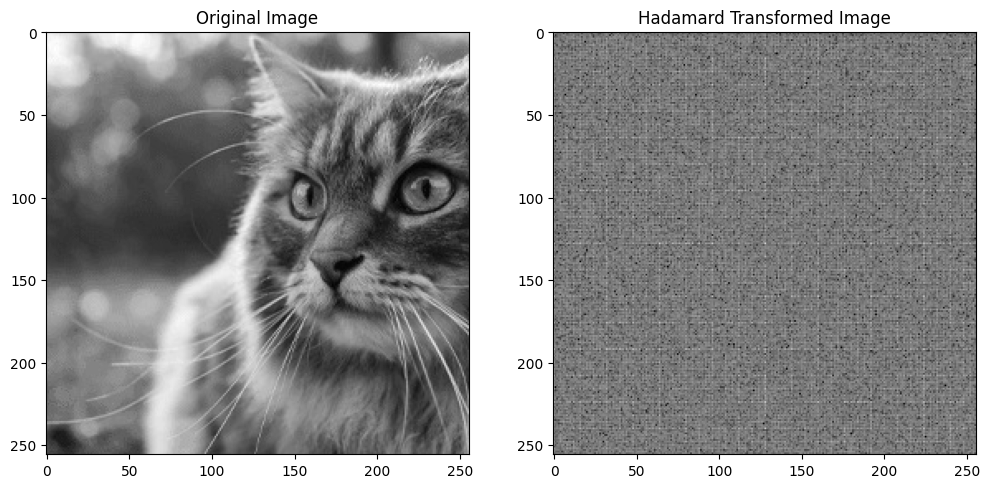

In [10]:
import numpy as np
from scipy.linalg import hadamard
import matplotlib.pyplot as plt
from PIL import Image

# Open the image file
img = Image.open('cat.jpg').convert('L')
img = np.array(img)

# Make sure the image dimensions are a power of 2
n = 2**int(np.log2(min(img.shape)))
img = img[:n, :n]

# Apply the Hadamard Transform
transformed = hadamard(n) @ img @ hadamard(n)

# Display the original and transformed images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Original image
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original Image')

# Transformed image
ax[1].imshow(np.log(np.abs(transformed)), cmap='gray')
ax[1].set_title('Hadamard Transformed Image')

plt.show()


<ipython-input-11-898243bc3159>:11: RuntimeWarning: overflow encountered in ubyte_scalars
  result[i // 2] = (data[i] + data[i + 1]) / np.sqrt(2)
<ipython-input-11-898243bc3159>:12: RuntimeWarning: overflow encountered in ubyte_scalars
  result[(n + i) // 2] = (data[i] - data[i + 1]) / np.sqrt(2)


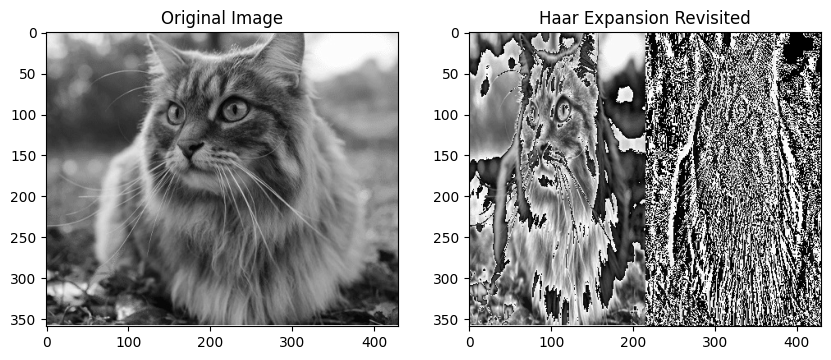

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def haar_transform(data):
    """Apply Haar transform to 1D data."""
    n = len(data)
    result = np.zeros_like(data, dtype=float)

    for i in range(0, n, 2):
        result[i // 2] = (data[i] + data[i + 1]) / np.sqrt(2)
        result[(n + i) // 2] = (data[i] - data[i + 1]) / np.sqrt(2)

    return result

def haar_expansion_revisited(image_path):
    # Read the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Haar expansion to each row
    transformed_image = np.zeros_like(img, dtype=float)
    for i in range(img.shape[0]):
        transformed_image[i, :] = haar_transform(img[i, :])

    # Display the original and transformed images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(transformed_image, cmap='gray')
    plt.title('Haar Expansion Revisited')

    plt.show()

# Specify the path to your image
image_path = 'cat.jpg'

# Perform Haar expansion revisited and display the images
haar_expansion_revisited(image_path)


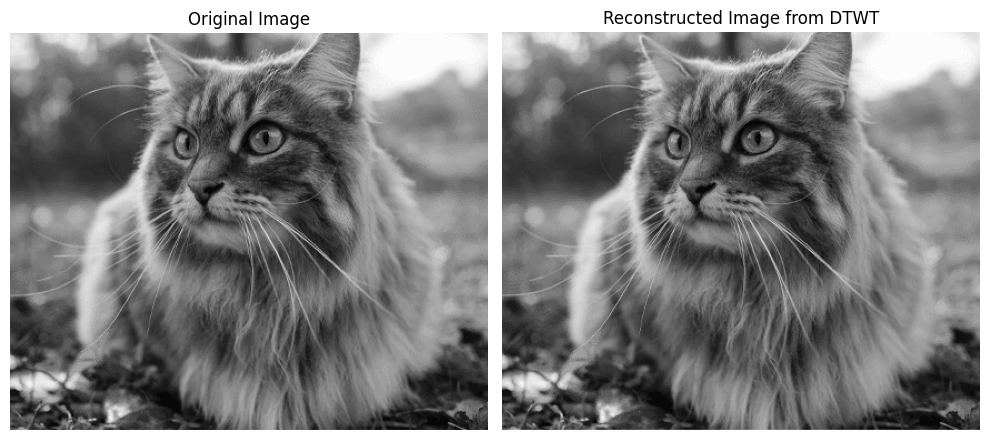

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from PIL import Image

# Load the image
image_path = "cat.jpg"
img = Image.open(image_path).convert("L")  # Convert to grayscale
data = np.array(img)

# Perform Discrete Time Wavelet Transform (DTWT)
wavelet = "db1"  # You can choose a different wavelet
coeffs = pywt.dwt2(data, wavelet)

# Reconstruct the image from the coefficients
reconstructed_image = pywt.waverec2(coeffs, wavelet)

# Visualize the original and reconstructed images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(data, cmap="gray")
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(reconstructed_image, cmap="gray")
axes[1].set_title("Reconstructed Image from DTWT")
axes[1].axis("off")

plt.tight_layout()
plt.show()


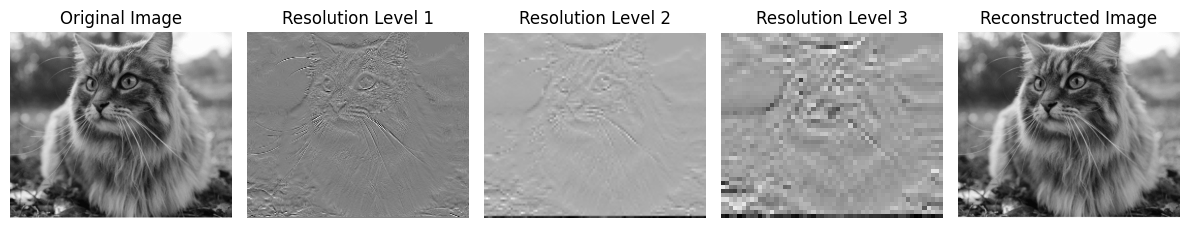

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from PIL import Image

# Load the image
image_path = "cat.jpg"
original_image = Image.open(image_path).convert("L")  # Convert to grayscale
original_array = np.array(original_image)

# Define the wavelet and decomposition level
wavelet = "haar"  # You can choose a different wavelet (e.g., "db1", "bior2.2")
level = 3  # You can adjust the decomposition level

# Perform multi-resolution analysis using wavelet transform
coeffs = pywt.wavedec2(original_array, wavelet, level=level)

# Reconstruct the image using coefficients
reconstructed_image = pywt.waverec2(coeffs, wavelet)

# Display the original and reconstructed images at different resolutions
fig, axes = plt.subplots(1, level + 2, figsize=(12, 4))
axes[0].imshow(original_array, cmap=plt.cm.gray)
axes[0].set_title('Original Image')

for i in range(level):
    # Access the details coefficients at each level
    detail_coefficients = coeffs[level - i][0]

    axes[i + 1].imshow(detail_coefficients, cmap=plt.cm.gray)
    axes[i + 1].set_title(f'Resolution Level {i + 1}')

axes[level + 1].imshow(reconstructed_image, cmap=plt.cm.gray)
axes[level + 1].set_title('Reconstructed Image')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()


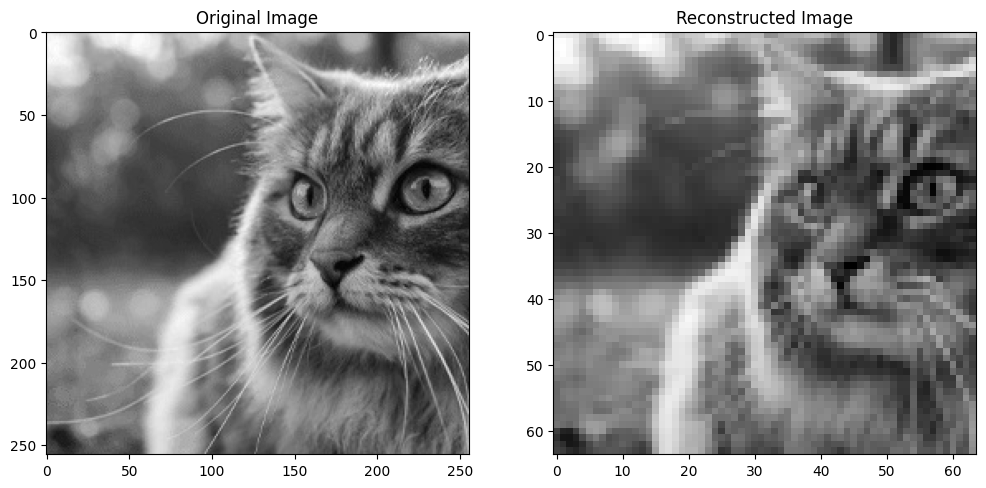

In [10]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
from PIL import Image

# Open the image file
img = Image.open('cat.jpg').convert('L')
img = np.array(img)

# Make sure the image dimensions are a power of 2
n = 2**int(np.log2(min(img.shape)))
img = img[:n, :n]

# Apply the Wavelet Packet Transform
wp = pywt.WaveletPacket2D(data=img, wavelet='db1', mode='symmetric')

# Select a node from the decomposition tree and reconstruct the image from this node
node = wp['aa']
reconstructed = node.reconstruct(update=True)

# Display the original and reconstructed images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Original image
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original Image')

# Reconstructed image
ax[1].imshow(reconstructed, cmap='gray')
ax[1].set_title('Reconstructed Image')

plt.show()


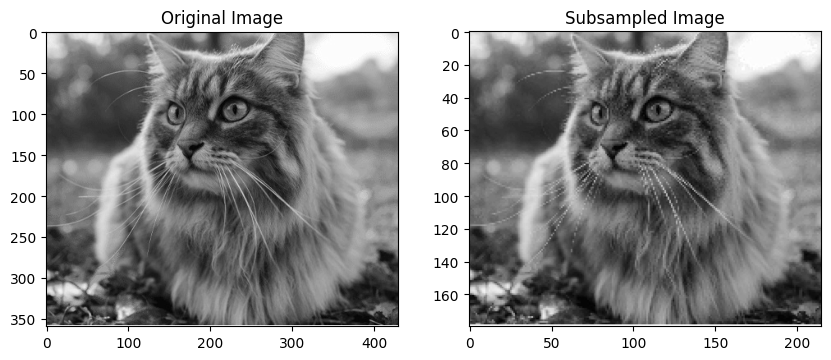

In [12]:
import cv2
import matplotlib.pyplot as plt

# Read the image in grayscale
img = cv2.imread('cat.jpg', cv2.IMREAD_GRAYSCALE)

# Subsample the image by keeping every second row and column
subsampled_img = img[::2, ::2]

# Display the original and subsampled images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(subsampled_img, cmap='gray')
plt.title('Subsampled Image')
plt.show()
